<b><font size=5><center>Анализ и подготовка плана действий по удержанию клиентов</center></font></b>

### Суть проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.
А именно:

    научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
    сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
    проанализировать основные признаки, наиболее сильно влияющие на отток;
    сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
        1) выделить целевые группы клиентов;
        2) предложить меры по снижению оттока;
        3) определить другие особенности взаимодействия с клиентами.

### Описание проекта

В ходе выполнения проекта мы получили и проанализировали данные, построили и отобразили матрицу корреляции. Построили модель бинарной классификации клиентов и обучили ее на train-выборке логистической регрессией и случайным лесом. Провели кластеризацию клиентов. Сделали выводы.

### Описание данных

Данные клиента за предыдущий до проверки факта оттока месяц:
- `'gender'` — пол;
- `'Near_Location'` — проживание или работа в районе, где находится фитнес-центр;
- `'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- `'Phone'` — наличие контактного телефона;
- `'Age'` — возраст;
- `'Lifetime'` — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- `'Contract_period'` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- `'Month_to_end_contract'` — срок до окончания текущего действующего абонемента (в месяцах);
- `'Group_visits'` — факт посещения групповых занятий;
- `'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента;
- `'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц;
- `'Avg_additional_charges_total'` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

`'Churn'` — факт оттока в текущем месяце.

### Получение данных

In [1]:
import pandas as pd                     # импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 

from sklearn.metrics import accuracy_score, precision_score, recall_score
import itertools 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\mi\Downloads\gym_churn.csv")
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Исследовательский анализ EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

В датасете находится 4000 записей и 14 колонок. Пропусков в данных нет. Формат данных подходящий

In [4]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Судя по описанию, среднестатистический клиент - это человек, живущий рядом с фитнес-клубом, купивший абонемент от 1 до 6 месяцев, возрастом примерно 29 лет, посещающий фитнес-клуб 2 раза в неделю.

In [5]:
df.duplicated().sum() #проверка наличия дубликатов

0

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [6]:
churn_grouped_df = df.groupby('Churn').mean()
churn_grouped_df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


По выведенным данным видно, что средние значения некоторых признаков значительно отличаются у тех, кто ушел в отток, и тех, кто остался. Например, признаки в столбцах Partner, Promo_friends, Contract_period, Group_visits, Avg_additional_charges_total, Month_to_end_contract, Lifetime, Avg_class_frequency_total и Avg_class_frequency_current_mont. У тех, кто ушел в отток, среднее меньше.

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

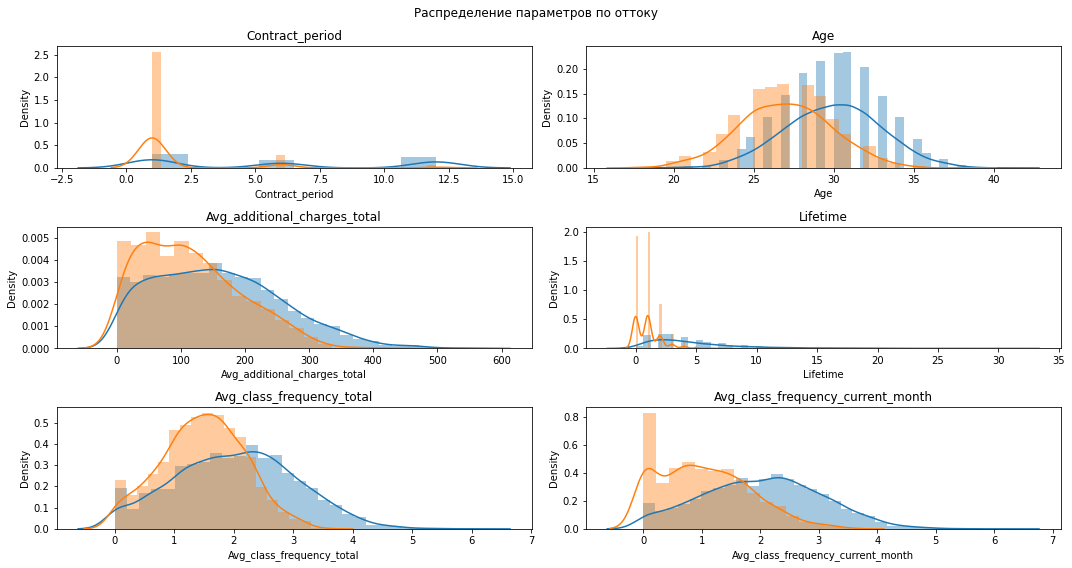

In [7]:
research = ['Contract_period', 'Age', 'Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
col_count, row_count = 2,3
plt.figure(figsize = (15, 8))
for i, j in enumerate(research):
    for churn in df['Churn'].unique():
        current = df.query('Churn == @churn')
        sns.distplot(current[j], label = df['Churn'].unique(),
                    ax = plt.subplot(row_count, col_count, i+1))
        plt.title(j)

plt.suptitle('Распределение параметров по оттоку')
plt.tight_layout()


Построим матрицу корреляций и отобразим её

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


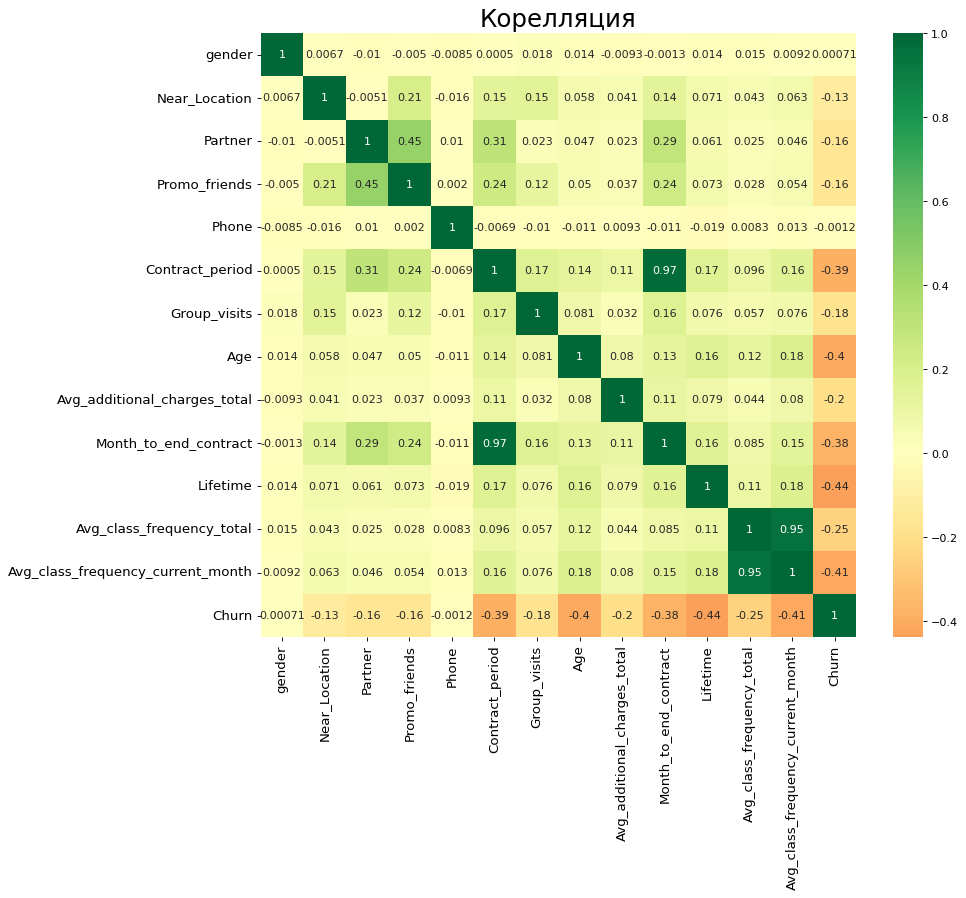

In [8]:
display(df.corr())

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Корелляция', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Сильную взаимосвязь имеют Contract_period и Month_to_end_contract, Avg_class_frequency_total и Avg_class_frequency_current_month, что вполне логично. А признак оттока имеет среднюю обратную корелляцию с Contract_period, Age, Month_to_end_contract, Lifetime и Avg_class_frequency_current_month.
Чтобы не получилось перекоса в обучении, избавимся от мультиколлинеарности - возьмем для дальнейшей работы датафрейм без столбцов Month_to_end_contract и Avg_class_frequency_current_month.

In [9]:
clear_df = df.drop(columns=['Month_to_end_contract', 'Avg_class_frequency_current_month'])
clear_df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0


### Вывод

На входе мы имеем датасет из 4000 записей и состоящий из 14 столбцов. 
В нем содержатся:
    Данные клиента за предыдущий до проверки факта оттока месяц:
        'gender' — пол;
        'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
        'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
        Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
        'Phone' — наличие контактного телефона;
        'Age' — возраст;
        'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
    Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
        'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
        'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
        'Group_visits' — факт посещения групповых занятий;
        'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
        'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
        'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
    'Churn' — факт оттока в текущем месяце.
    По полученным данным, можно предположить, что отток клиентов зависит от длительности абонемента, возраста, срока до окончания текущего абонемента, времени с момента обращения в фитнес и средней частоты посещений зала в неделю

### Построение модели прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце

In [10]:
X = clear_df.drop('Churn', axis = 1) # разделение данных на признаки (матрица X) и целевую переменную (y)
y = clear_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # разделение модели на обучающую и валидационную выборку

scaler = StandardScaler() # обучение StandartScaler на обучающей выборке
scaler.fit(X_train)

X_train_st = scaler.transform(X_train) # преобразование обучающих и валидационных наборов данных
X_test_st = scaler.transform(X_test)

Обучим модель на train-выборке логистической регрессией

In [11]:
lr_model = LogisticRegression(solver='liblinear') # задаем алгоритм для модели

lr_model.fit(X_train, y_train) # обучение модели

lr_predictions = lr_model.predict(X_test) # прогнозы
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions))) #вывод метрик для полученного прогноза
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))

Accuracy: 0.88
Precision: 0.76
Recall: 0.77


Теперь обучим случайным лесом и сравним метрики

In [12]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0) # алгоритм для новой модели на основе алгоритма случайного леса
rf_model.fit(X_train_st, y_train)
y_pred = rf_model.predict(X_test_st) 

rf_predictions = rf_model.predict(X_test_st) # сделаем прогнозы
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions))) #вывод метрик для полученного прогноза
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Accuracy: 0.89
Precision: 0.79
Recall: 0.76


### Вывод

Вывод метрик для прогнозов после обучения логистической регрессией и случайным лесом показали, что обе модели хороши, но модель, обученная случайным лесом, показывает чуть более лучший результат.

### Кластеризация клиентов

Отложим в сторону столбец с оттоком и проведем кластеризацию объектов (клиентов)

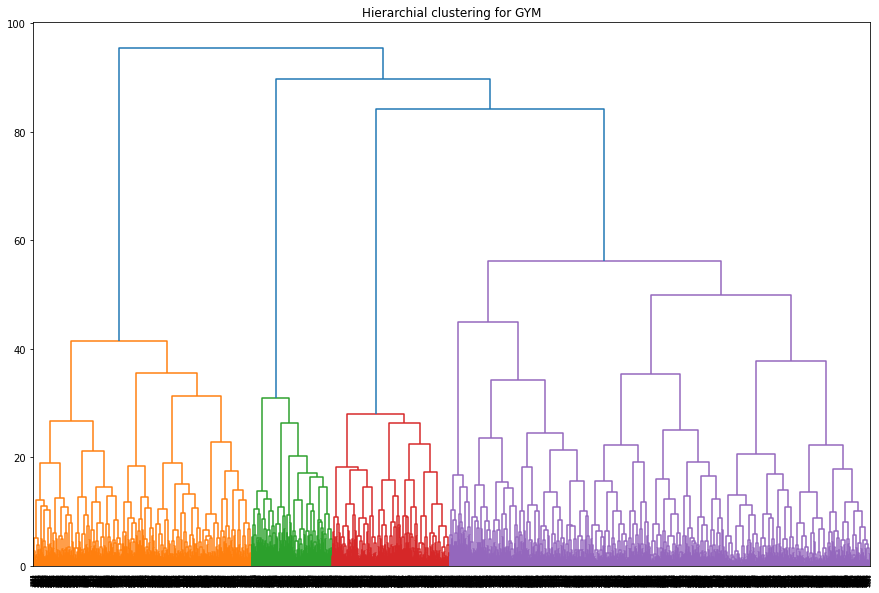

In [13]:
sc = StandardScaler()   #стандартизируем данные
X_sc = scaler.fit_transform(clear_df.drop(columns = ['Churn']))

linked = linkage(X_sc, method = 'ward') 

X_sc[:10]

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

Исходя из дендограммы, можно выделить 4 кластера

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Churn
cluster_km,,,,,,,,,,,,
0,0.525180,1.000000,0.175982,0.061981,1.0,3.032651,0.394023,28.975650,143.394738,3.335362,1.848500,0.333149
1,0.489567,0.995987,0.941413,0.771268,1.0,7.784912,0.513644,29.659711,157.172004,4.521669,1.979866,0.105939
2,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
3,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


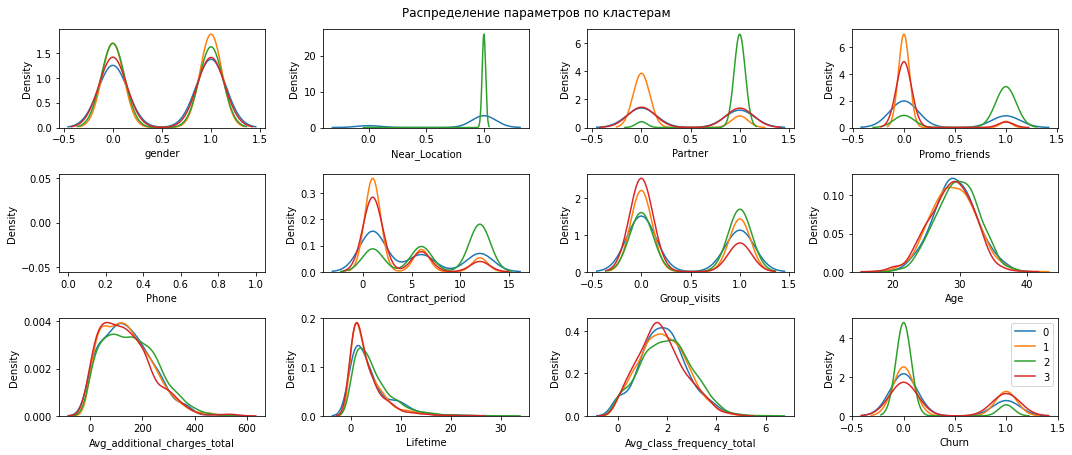

In [14]:
km = KMeans(n_clusters=4, random_state=0)  # задаём модель k_means с числом кластеров 5 и фиксируем значение random_state

labels = km.fit_predict(X_sc) # прогнозируем кластеры для наблюдений

clear_df['cluster_km'] = labels # сохраняем метки кластера в поле нашего датасета

clusters = clear_df.groupby(['cluster_km']).mean() # выводим статистику по средним значениям наших признаков по кластеру
display(clusters)

col_count, row_count = 2,3 #Построение распределения признаков для кластеров
plt.figure(figsize = (15, 8))
params = clear_df.columns.drop('cluster_km')
for i, param in enumerate(params):
    plt.subplot(4, 4, i+1)
    for cluster in clear_df['cluster_km'].unique():
        sns.distplot(clear_df[clear_df['cluster_km'] == cluster][param], kde=True, hist=False)
plt.xlabel = param
plt.ylabel = ''
plt.legend(['0', '1', '2', '3'])
plt.suptitle('Распределение параметров по кластерам')
plt.tight_layout()

In [15]:
clear_df.groupby('cluster_km').agg({'Churn': 'mean'})

,Churn
cluster_km,
0,0.333149
1,0.105939
2,0.399287
3,0.266839


По выведенным средним данным и графикам распределения можно сразу заметить, что в кластер 2 попали клиенты в основном с самым длительным абонементом  - они реже уходят, проживают в одном районе с фитнес-клубом и приходят по партнерской программе. В то же время кластер 1 и 3, которые отличаются частыми оттоками, также имеет меньший срок абонемента, меньше ходят на групповые занятия и приходят по промо-коду. Таким образом, можно сказать, что кластер 2 более надежен в плане оттока клиентов.

### Общий вывод

#### В ходе выполнения проекта мы получили и проанализировали данные, построили и отобразили матрицу корреляции. Построили модель бинарной классификации клиентов и обучили ее на train-выборке логистической регрессией и случайным лесом. Провели кластеризацию клиентов. Сделали выводы.
По построенной и выведенной матрице корреляции мы предположили, что отток клиентов зависит от длительности абонемента, возраста, срока до окончания текущего абонемента, времени с момента обращения в фитнес и средней частоты посещений зала в неделю.
После вывода метрик для прогнозов после обучения логистической регрессией и случайным лесом видно, что модель, обученная логистической регрессией, показывает чуть более лучший результат.
На основании выведенной дендрограммы мы выделили 4 кластера.
Анализ выявил, что в кластер 2 попали клиенты в основном с самым длительным абонементом - они реже уходят, проживают в одном районе с фитнес-клубом и приходят по партнерской программе. В то же время кластер 1 и 3, которые отличаются частыми оттоками, также имеет меньший срок абонемента, меньше ходят на групповые занятия и приходят по промо-коду. Таким образом, можно сказать, что кластер 2 более надежен в плане оттока клиентов.
Рекомендации по работе с клиентами:
- стараться продавать более длительные абонементы, а людей с короткими сроками стимулировать посещать чаще, особенно групповые занятия;
- разместить рекламу в районе фитнес-клуба, т.к. клиенты, живущие рядом, уходят реже;
- промо-код "Приведи друга" в длительной перспективе не приносит пользы - надо пересмотреть его эффективность и, может быть, заменить другой бонусной программой.